## Statistical Distributions Webinar

<b>22nd July 2019</b>

<b>Robert Manriquez</b>

<b>Emeritus Columbia ADS</b>

#### Objectives:
* Introduce common distributions for data science and become familar with their properties and applications:
    - Uniform / Non-uniform
    - Normal / Gaussian
    - Bernoulli & Binomial
    - Geometric
    - Exponential (if time permits)
* Discuss the Properties of the Normal Distribution
* Prepare for Assignment
    - Expected Values
    - Distriubtions with scipy stats
    - Using distributions to answer stats/probability questions.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
sns.set_style('darkgrid')
%matplotlib inline
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

#### Uniform Distributions, Non-Uniform Distributions and Expected Values

* How would we describe the possible outcomes of an event with set probabilities for each outcome?
- Let's consder rolling a single die, in which each side has an equal (uniform) probability but differing values.

In [2]:
def plot_uniform_distr(values, p, n_die):
    plt.figure(figsize = (8,5))
    plt.bar(values, p)
    plt.title("Uniform Distriubtion {}".format(n_die), fontsize = 15)
    plt.ylabel("P", fontsize = 15)
    plt.xlabel("Value", fontsize = 15)
    plt.ylim(top = 1.0)
    plt.show();
    
def plot_cumsum_uniform_distr(values, p, n_die):
    plt.figure(figsize = (8,5))
    plt.step(values, np.cumsum(p));
    plt.title("Cumulative Sum of {}".format(n_die), fontsize = 15)
    plt.ylabel("P", fontsize = 15)
    plt.xlabel("Value", fontsize = 15)
    plt.ylim(top = 1.1, bottom = 0)
    plt.show();

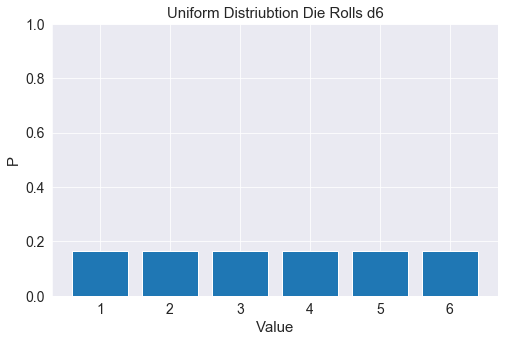

In [3]:
rolls_6d = [1, 2, 3, 4, 5, 6]
p_6d     = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

plot_uniform_distr(rolls_6d, p_6d, n_die = "Die Rolls d6")

#### Plotting possible values vs. their probability is essentially what a distribution is, uniform or not.  They usually tell us the probability of possible outcomes relative to each other, often expressed as above (Probability Mass Function / Probability Density)

#### Let's visualize this as a cumulative sum, which is the sum of each successive probability.
* Interpreted as the probability that a possible random result is less than OR equal to that value at each point.

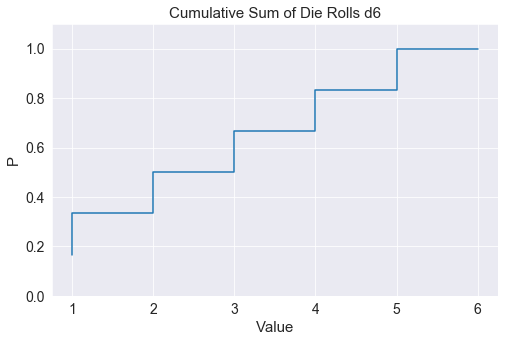

In [4]:
plot_cumsum_uniform_distr(rolls_6d, p_6d, 'Die Rolls d6')

From the cumulative sum of the possible results from rolling a d6:
* Odds of rolling at least 3 is greater than ~50% (3 * 1/6)
* Odds of rolling at least 4 is greater than ~66.6% (4 * 1/6)
* Odds of rolling at least 5 is greater than ~83.3% (5 * 1/6)
* Odds of rolling a 6 or less is 100%
* Odds of rolling less than 1 is 0%

#### Question: What is the expected value from rolling a 6-sided die?

### Definition: Expected Value

$$E[x] = \sum x * P(x) $$

* The expected value from a distribution is the sum of every possible value multiplied by its probability.
* Interpreted as the "most likely" result, or the "expected value" from an event.
* Also applies to <b> Linear Combinations</b> of of normal distributions (you'll see this in Assignment 5)

In [5]:
EV_6d = (1 * 1/6) + (2 * 1/6) + (3 *1/6) + (4 * 1/6) + (5 * 1/6) + (6 * 1/6)
print(EV_6d)

3.5


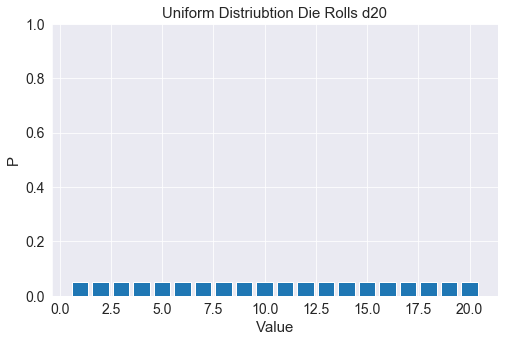

In [6]:
rolls_d20 = range(1,21)
p_d20     = [1/20 for i in rolls_d20]

plot_uniform_distr(rolls_d20, p_d20, n_die= "Die Rolls d20")

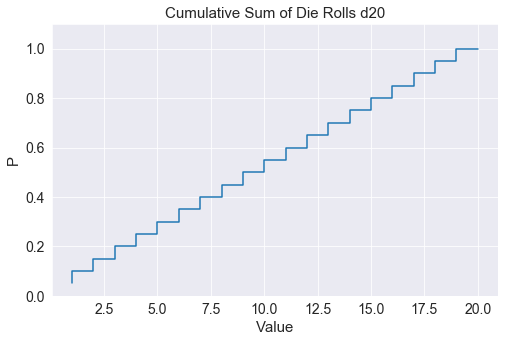

In [7]:
plot_cumsum_uniform_distr(rolls_d20, p_d20, n_die= "Die Rolls d20")

In [8]:
EV_d20 = sum([r*p for r, p in zip(rolls_d20, p_d20)])
print(EV_d20)

10.5


* What about a non-uniform distribution?

#### Example:  Probability of being late to work.
* "x" is the number of times I'm late to work in any given week.
* How often would you expect me to be late to work?
* (In other words, what is the "expected value" of me being late this week?)

| x | P(x) |
|---|------|
| 0 | 0.3  |
| 1 | 0.6  |
| 2 | 0.075  |
| 3 | 0.025 |

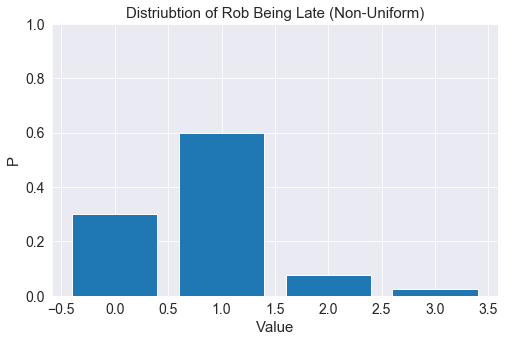

In [9]:
late_values = [0, 1, 2, 3]
p_late      = [0.3, 0.6, 0.075, 0.025]

plt.figure(figsize = (8,5))
plt.bar(late_values, p_late)
plt.title("Distriubtion of Rob Being Late (Non-Uniform)", fontsize = 15)
plt.ylabel("P", fontsize = 15)
plt.xlabel("Value", fontsize = 15)
plt.ylim(top = 1.0)
plt.show();

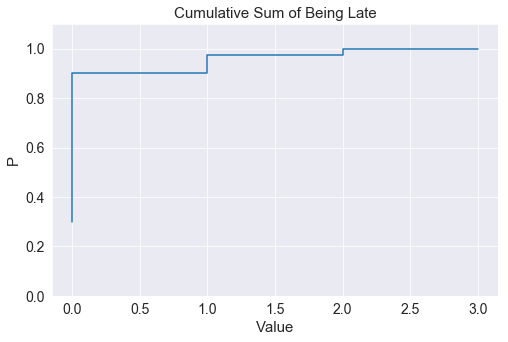

In [10]:
plot_cumsum_uniform_distr(late_values, p_late, 'Being Late')

In [11]:
EV_late = (0 * 0.3) + (1 * 0.5) + (2 * 0.075) + (3 * 0.025)
print(round(EV_late, 3))

0.725


In [12]:
0.725 * 4

2.9

How do we intrepet this?
* You could expect me to be late 0.725 times each week, or almost 3 times per months (\$0.725 * 4 = 2.9$)
* I'm more likely than not to be late once a week, but occaisionaly I'm never late.
* From the Cumulative Sum, I've got an 80% chance of being late at least in a week (but the odds of me being late *exactly* once is still 50% from the P(x) table!!).

### Bernoulli Distribution & Binomial Distribution

* Let's talk about a more practical approach to modeling probabilities of certain outcomes.  Often times, we'll want to know more than just the most probable outcome, the "expected value" from an event, or how likely a we to observe a certain outcome relative to the other possibilities (i.e. from the cumulative sums).

* The Bernoulli Distribution can be used to model a single event with *binary* outcomes (only 2 results possible).  

The <b>Bernoulli Distribution</b> can be defined as:



$$  f(x|p) = \begin{cases} p & \text{for }x=1 \\ 1-p & \text{for }x=0 \\ \end{cases}$$


Where x is the outcome given p, the probability of that outcome.

Note:
- The probability of x = 1 ("Success") is $p$
- The probability of x = 0 ("Failure") is $1 - p$.

This can be easily applied to situations like coin flips ($P(H) = 0.50,  P(T) = 0.50$) or win rates ($P(Win) = x, P(Lose) = 1 - x$).

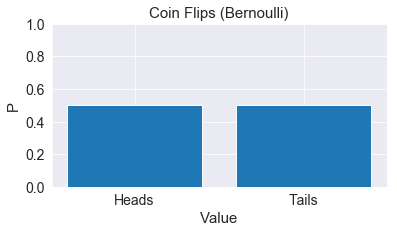

In [13]:
vals = ["Heads", "Tails"]
p_coins =  [0.5, 0.5]

plt.figure(figsize = (6,3))
plt.bar(vals, p_coins)
plt.title("Coin Flips (Bernoulli)", fontsize = 15)
plt.ylabel("P", fontsize = 15)
plt.xlabel("Value", fontsize = 15)
plt.ylim(top = 1.0)
plt.show();

* However, an even more useful is the <b>Binomial Distribution</b>, which is modeling the probability of observing a certain number of success / failures for a certain number of trials.
    - Question to ask when modeling a binomial event: "How many trials will it take to observe the number of successes I want?"
    
Definition:

$$ f(x|n,p) = P(X = x) = \binom n x  p^x(1-p)^{n-x} $$

Which described the probablity of $x$ number of successes given the number of trials $n$ and proability of observing a success $p$.

#### Example: Coin Flips
- What is the probability of getting flipping *exactly* 20 heads out of 50 coin flips?

In [14]:
# Heads = "Success", Tails = "Fail"
def plot_bernoulli(n, p):
    
    coin_flip_trials = np.arange(0, n + 1)
    coin_binom = stats.binom(n, p)
    
    plt.figure(figsize=(8,5))
    plt.bar(coin_flip_trials, coin_binom.pmf(coin_flip_trials))
    plt.title("Binomial Distr. (n = {}, p = {})".format(n,p), fontsize = 15)
    plt.ylabel("P", fontsize = 15)
    plt.xlabel("Trials", fontsize = 15)
    plt.show();

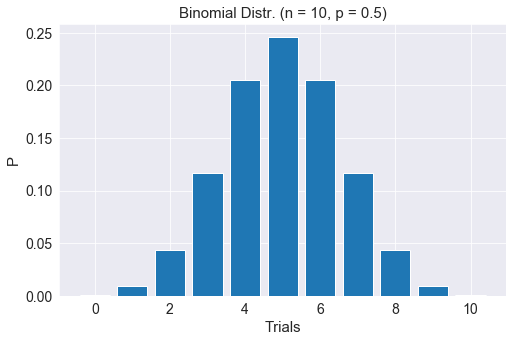

In [15]:
p_heads = 0.5
n = 10

plot_bernoulli(n, p_heads)

* From the graph, we have ~ 4% chance to get exactly 15 heads.
* The most probable result it getting exactly 5H and 5T is 25%, just as we would expect.
* How would this change from with an unfair coin?

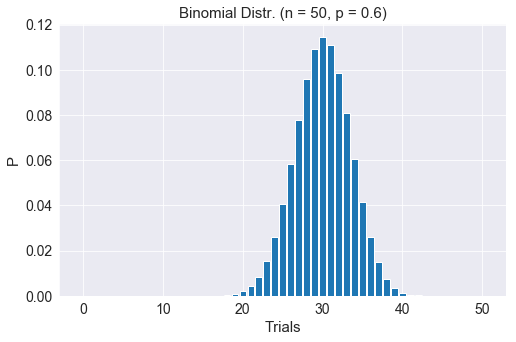

In [16]:
plot_bernoulli(n = 50, p = 0.6)

* We would have an even *lower* chance of getting 20 heads in 50 flips with $P(H) = 0.6$, and our most likely result is observing 30 heads instead!

* Bonus: If the Denver Nuggets have a win rate on 74% at home games, what's the chance of me seeing at least 30 winning games? (Let's assume they play 40 home games this season)

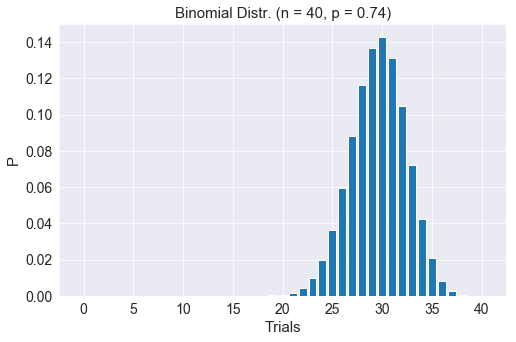

In [17]:
plot_bernoulli(n = 40, p = 0.74)

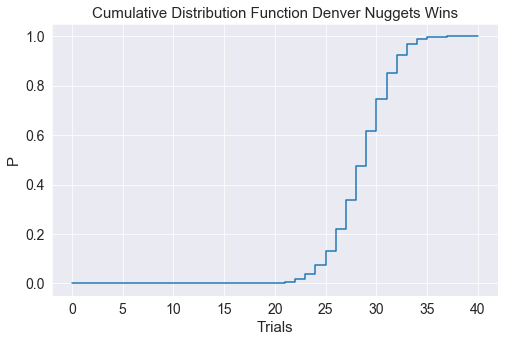

In [18]:
n_games = 40
games_range = np.arange(0, 40 + 1)
p_nuggets_win = 0.74

plt.figure(figsize=(8,5))
plt.step(games_range, stats.binom(n_games, p_nuggets_win).cdf(games_range))
plt.title("Cumulative Distribution Function Denver Nuggets Wins", fontsize = 15)
plt.ylabel("P", fontsize = 15)
plt.xlabel("Trials", fontsize = 15)
plt.show();

In [19]:
stats.binom(n_games, p_nuggets_win).cdf(games_range)[29]

0.47402603047478736

In [20]:
1 - stats.binom(n_games, p_nuggets_win).cdf(games_range)[35]

0.01136083855385539

* The Cumulative Distribution Function tells me that there's ~38% chance of the Nuggets winning at least 30 games.

### Geometric and Exponential Distribution Functions

* We have an idea of how to model probablities of a series of events, but what if we want to ask the question "How many trials do I need until I see the *first* success?

Definition: <b>Geometric Distribution</b>:

$$ f(x|p) = (1 - p)^{x}\,p $$

In which $x$ is the number of trials and  $p$is the probability of success for each trial.

* How many games until we see the Nuggets win?  Until they lose?

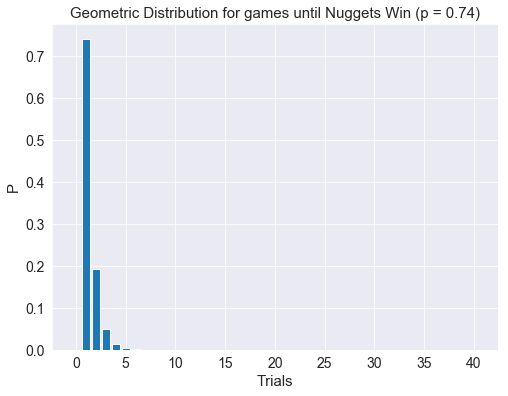

In [21]:
plt.figure(figsize = (8,6))
plt.bar(games_range, stats.geom(p_nuggets_win).pmf(games_range))
plt.title("Geometric Distribution for games until Nuggets Win (p = 0.74)", fontsize = 15)
plt.ylabel("P", fontsize = 15)
plt.xlabel("Trials", fontsize = 15)
plt.show();

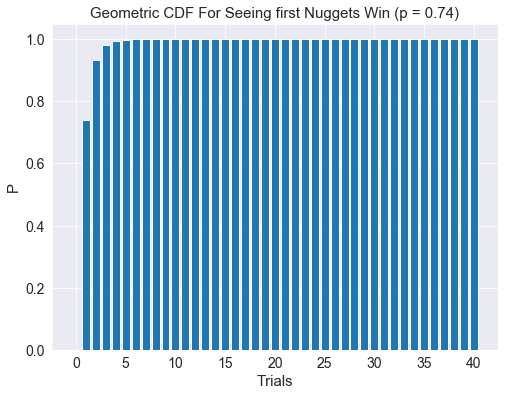

In [22]:
plt.figure(figsize = (8,6))
plt.bar(games_range, stats.geom(p_nuggets_win).cdf(games_range))
plt.title("Geometric CDF For Seeing first Nuggets Win (p = 0.74)", fontsize = 15)
plt.ylabel("P", fontsize = 15)
plt.xlabel("Trials", fontsize = 15)
plt.show();

* Approaches 100% chance of seeing a win after ~ 5 games!

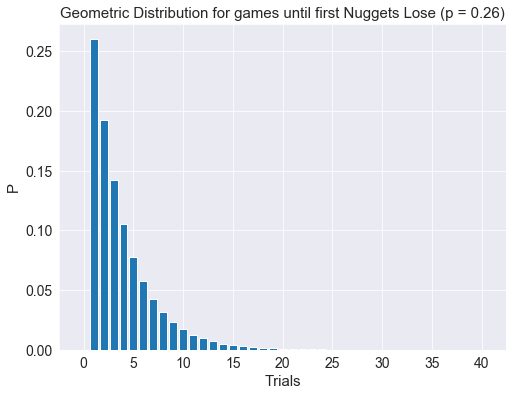

In [23]:
plt.figure(figsize = (8,6))
plt.bar(games_range, stats.geom(1 - p_nuggets_win).pmf(games_range))
plt.title("Geometric Distribution for games until first Nuggets Lose (p = 0.26)", fontsize = 15)
plt.ylabel("P", fontsize = 15)
plt.xlabel("Trials", fontsize = 15)
plt.show();

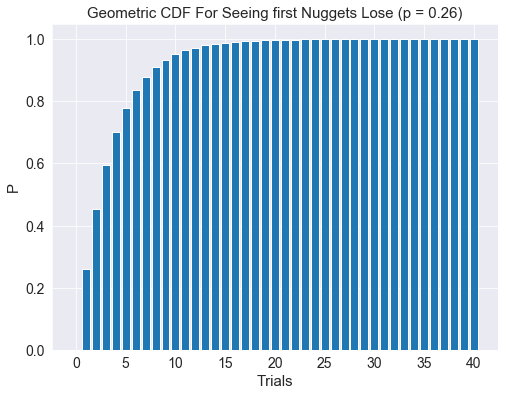

In [24]:
plt.figure(figsize = (8,6))
plt.bar(games_range, stats.geom(1 - p_nuggets_win).cdf(games_range))
plt.title("Geometric CDF For Seeing first Nuggets Lose (p = 0.26)", fontsize = 15)
plt.ylabel("P", fontsize = 15)
plt.xlabel("Trials", fontsize = 15)
plt.show();

* Approaches 100% chance of seeing a loss after ~ 20 games!

#### Normal Distriubtion / Gaussian Distribution

![img](normal_distr.png)


### Formal Definition:
 $$ f(x \; | \; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} } $$

### Properties:

* "Parameterized" by the mean ($\mu$) and standard deviation ($\sigma$) of a sample population.
    - The mean is centered.
    - Values can be described as "number of standard deviations" away from the mean.
    
    
* Has an intuitive and practical behavior, extremely convenient to model a population if it fits the normal distribution.
    - Z-Scores can be used to describe probability of a value being above a certain number of standard deviations from the mean.
        
        
* Follows this pattern:
    - 68% of the population's values are within 1 $\sigma$ from the mean
    - 95% of the population's values are within 2 $\sigma$ from the mean
    - 99.7% of the population's values are within 3 $\sigma$ from the mean
    
    
* The crux of the Central Limit Theorem (this will be covered more in the Statistical Sampling Module).


* (This will be covered in the module video, quiz, and Assignment 5)

![img](normal_distr2.png)

/Users/robertmanriquez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


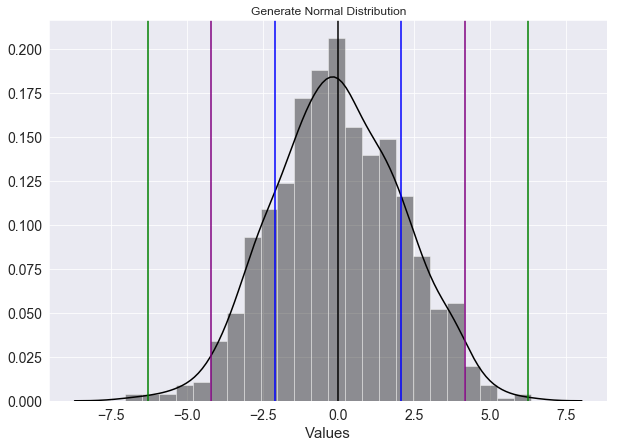

Stats for the randomly generated Normal Distr: 
 Mean   :  -0.016 
 StdDev :  2.094


In [25]:
# Generating a normal distribution using numpy
mu = 0
sigma = 2
s = np.random.normal(mu, sigma, 1000)
bins = 30

plt.figure(figsize=(10,7))
sns.distplot(s, color= 'black')
plt.axvline(np.mean(s), color = 'black')

for i, c in zip([1,2,3], ['blue', 'purple', 'green']):   
    plt.axvline(np.mean(s) + i * np.std(s), color = c)
    plt.axvline(np.mean(s) - i * np.std(s), color = c)

plt.xlabel("Values", fontsize =15)
plt.title("Generate Normal Distribution")
plt.show();
print("Stats for the randomly generated Normal Distr: \n Mean   : ",
      round(np.mean(s),3), "\n", "StdDev : ", round(np.std(s),3))

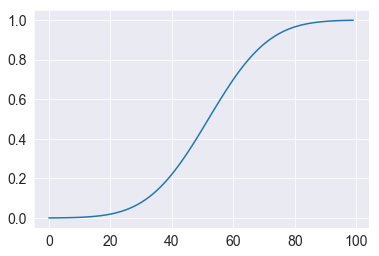

In [26]:
plt.plot(stats.norm(np.mean(s), np.std(s)).cdf(np.linspace(min(s), max(s), 100)))

#### Extra Resources

* https://seeing-theory.brown.edu/probability-distributions/index.html#section2
    - This is where we got interactive graphics and demos of probability and distributions.


* Practical Statistics for Data Scientists
    - A book I borrowed some graphics from, all around good references (I'd recommend finding an ebook or free chapter online rather than outright buying it.  It's also in R, not Python).
    
* https://scipy.org
    - Popular scientific/math computing packages, it's documentation describes how to use the stats.binom(n,p).pmf() functions for working with distributions.